<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [275]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



In [276]:
# Inciso 1
# Agrupamos por "type" y contamos
df_type = df.groupby('type')["show_id"].count().reset_index().rename(columns = {"show_id": "count"})
df_type.head()

,type,count
0,Movie,6131
1,TV Show,2676


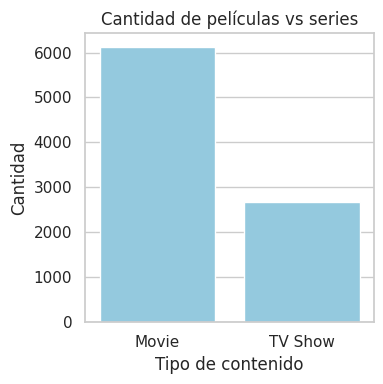

In [277]:
plt.figure(figsize=(4, 4)) # Definir el tamaño de la figura
# Gráfico de barras
sns.barplot(x="type", y="count", data=df_type, color="skyblue")
# Títulos
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.title('Cantidad de películas vs series')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

El tipo de contenido predominante en Netflix son las películas. Esto podría implicar que los usuarios más adeptos a las películas prefieran mantener su suscripción, mientras que los fanáticos de las series no puedan encontrar su tipo de contenido preferido y abandonen la plataforma.

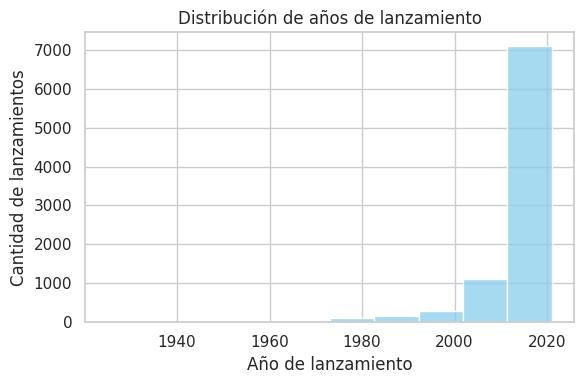

In [278]:
# Inciso 2
plt.figure(figsize=(6, 4))  # Definir el tamaño de la figura
# Histograma
sns.histplot(
    data = df,
    x='release_year',
    color = 'skyblue',
    bins=10
)

# Personalizar el gráfico
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Distribución de años de lanzamiento')


# Mostrar el gráfico
plt.tight_layout()
plt.show()


Definitivamente, hay más contenido reciente que antiguo. Es posible observar que la cantidad de lanzamientos ha ido en aumento con los años, y que hay un "boom" durante las décadas de 2010 y 2020.

In [279]:
# Inciso 3
# Agrupamos por "rating" y contamos
df_rating = df.groupby('rating')["show_id"].count().reset_index().rename(columns = {"show_id": "count"})
df_rating.head(8)

,rating,count
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490


In [280]:
# Hay mucho rating aislado
# Agrupamos en "otros"

# Función recibe una columna, retorna el rating o el string "Otros"
def agrupar_otros(col):
  if col["count"] < 100:
    return "Otros"
  else:
    return col["rating"]

df_rating["rating"] = df_rating.apply(agrupar_otros, axis = 1)
# Volvemos a agrupar
df_rating = df_rating.groupby('rating')["count"].sum().reset_index().rename(columns = {"show_id": "count"})
df_rating


,rating,count
0,Otros,136
1,PG,287
2,PG-13,490
3,R,799
4,TV-14,2160
5,TV-G,220
6,TV-MA,3207
7,TV-PG,863
8,TV-Y,307
9,TV-Y7,334


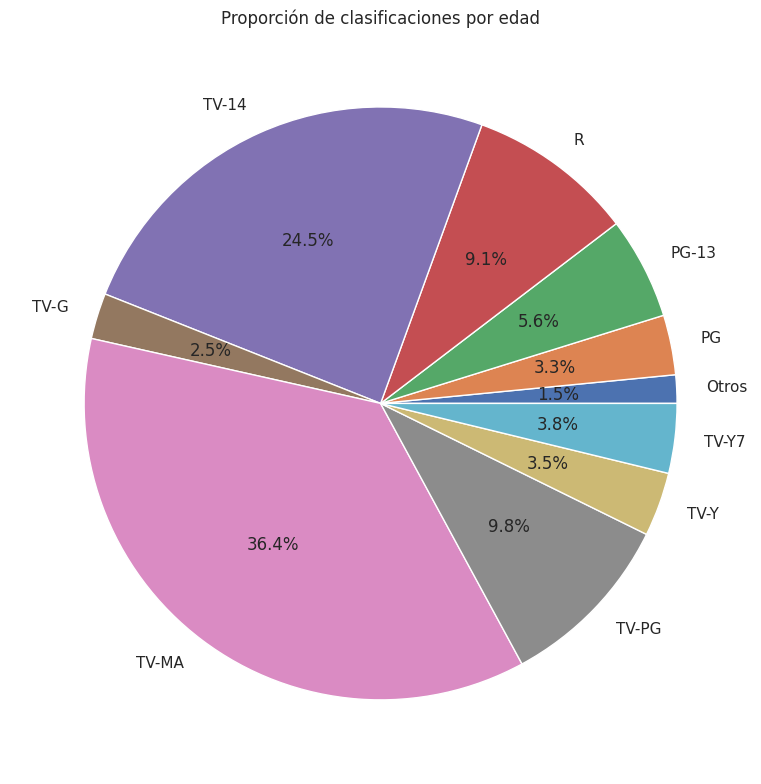

In [281]:
# Gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(df_rating['count'], labels=df_rating['rating'], autopct='%1.1f%%')
plt.title('Proporción de clasificaciones por edad')

#Mostrar el gráfico
plt.tight_layout()
plt.show()


Las clasificaciones más comunes son TV-MA (mayores de 17 años) y TV-14 (mayores de 14 años), las cuales representan más del 50% del contenido en la plataforma. Por ende, es posible afirmar que Netflix está más orientado a un publico adulto.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


In [282]:
# Inciso 4
# Transformamos columna "date_added" a tipo fecha
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
# Agrupamos por año agregado (no conviene graficar por dia porque son muchas)
df_date_added = df.groupby(df["date_added"].dt.year)["show_id"].count().reset_index().rename(columns = {"show_id": "count"})
df_date_added.tail()

,date_added,count
9,2017.0,1164
10,2018.0,1625
11,2019.0,1999
12,2020.0,1878
13,2021.0,1498


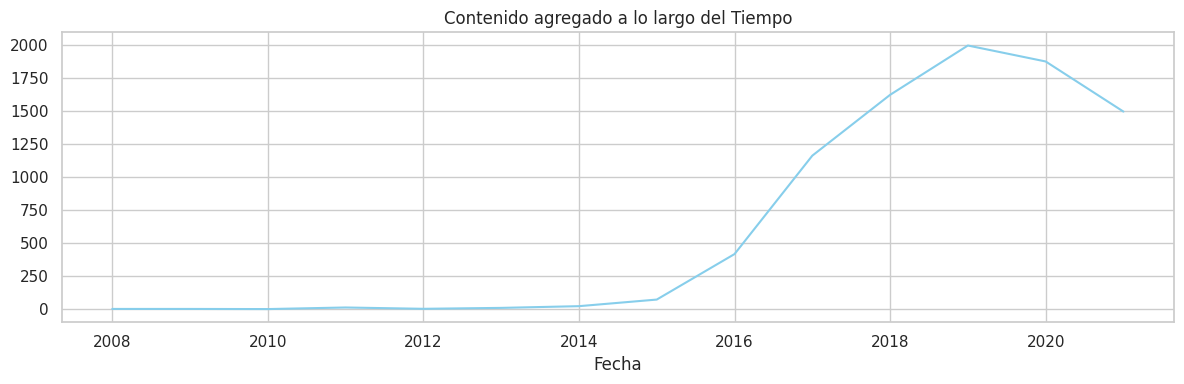

In [283]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_date_added,
    x='date_added',
    y='count',
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('')
plt.title('Contenido agregado a lo largo del Tiempo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El catálogo de Netflix creció más durante el 2019. Este peak podría explicarse por la estrategia de expansión internacional de la plataforma ocurrida entre el 2011 y el 2015: durante el periodo pre-2015, la atención estaba puesta en expandir el servicio a la mayor cantidad de países posibles, mientras que durante el periodo post-2015, el enfoque estaba en agregar más contenido para llamar y mantener a la audiencia.

In [284]:
# Inciso 5
# Agregamos columnas para el año y el mes (en tipo int)
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# Pivoteamos respecto al mes
df_heatmap = df.pivot_table(index="year_added", columns="month_added", values="show_id", aggfunc="count").fillna(0)
df_heatmap

month_added,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year_added,,,,,,,,,,,,
2008.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2013.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
2014.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0
2015.0,1.0,3.0,4.0,5.0,5.0,5.0,7.0,2.0,6.0,14.0,3.0,18.0
2016.0,41.0,15.0,16.0,21.0,11.0,18.0,28.0,34.0,46.0,51.0,42.0,95.0


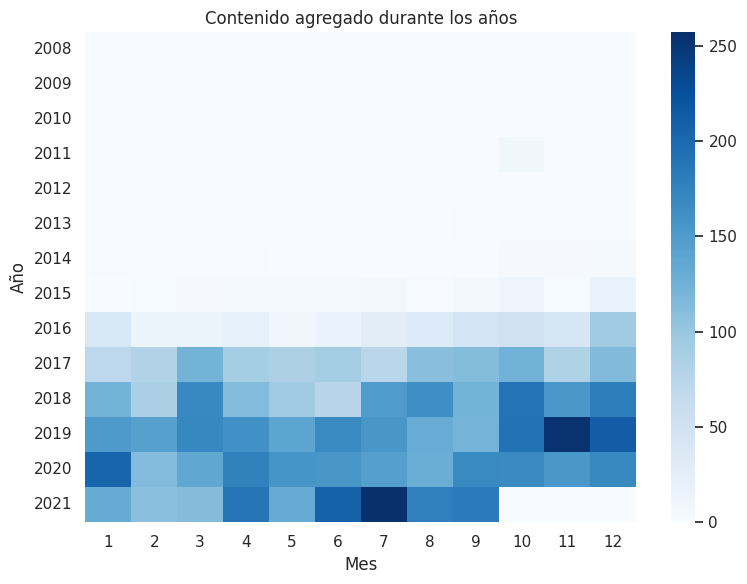

In [285]:

# Creamos el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, cmap='Blues', fmt=".2f")

# Título
plt.xlabel('Mes')
plt.ylabel('Año')
plt.title('Contenido agregado durante los años')

# Ajustar los ticks para que sean enteros
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[int(x)+1 for x in plt.xticks()[0]]
)
plt.yticks(
    ticks=plt.yticks()[0],
    labels=[int(y)+2008 for y in plt.yticks()[0]]
)

# Mostrar el heatmap
plt.tight_layout()
plt.show()

Sí, hay meses con más estrenos que otros. Podemos observar que durante los meses de vacaciones (meses 6-7 y 11-12-1) hay más lanzamientos que el resto del año. Asimismo, hay una tendencia a hacer estrenos entre los meses de marzo y abril (3 y 4), lo cual puede estar asociado al cambio de temporada (equinoccio de otoño o primavera). De esto, podemos concluir que existe una estrategia de estacionalidad de lanzamientos: los títulos son agregadas en periodos específicos del año (por ejemplo, las películas de navidad se agregan en noviembre-diciembre).

In [286]:
# Inciso 6
# Reutilizamos código del Lab 3
# Extraemos duración en minutos
df_duration = df.assign(duration_2=df["duration"].str.extract(r'(\d+)\s+min').astype(float))
#Este comando retorna NaN para las series, pues su duración está en temporadas en lugar de minutos

# Nos quedamos con las películas
df_duration = df_duration.loc[df_duration["type"]=="Movie"]
# Conseguimos el género principal (Asumiremos que es el primero)
df_duration["genre"] = df_duration["listed_in"].str.split(",").str[0]
df_duration.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_2,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,91.0,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,125.0,Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,104.0,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,127.0,Dramas


**Suposición:** Asumiremos que el género principal de cada película es el primer género escrito en la columna `listed_in`.

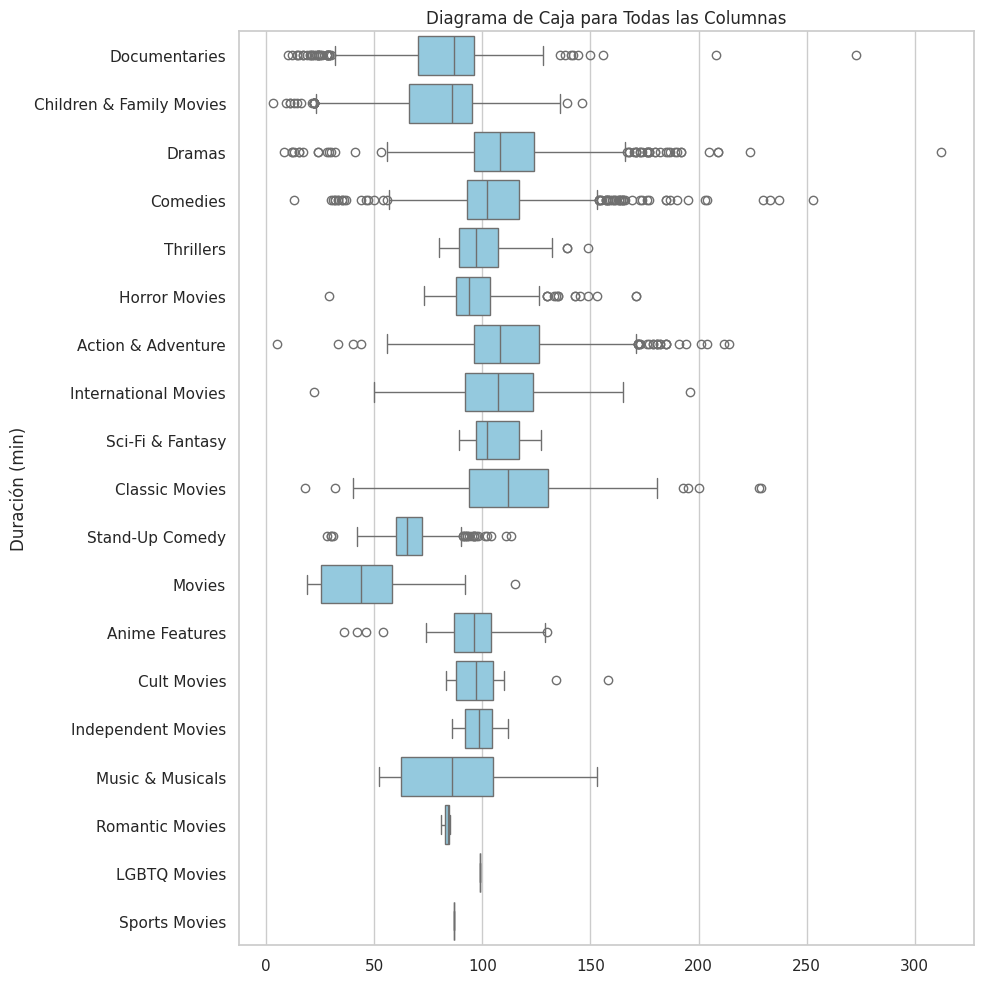

In [287]:
# Creamos el gráfico de diagrama de caja
plt.figure(figsize=(10, 10))  # Definir el tamaño de la figura
sns.boxplot(x="duration_2", y="genre", data=df_duration, color='skyblue', orient="h")

# Personalizamos el gráfico
plt.xlabel('')
plt.ylabel('Duración (min)')
plt.title('Diagrama de Caja para Todas las Columnas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los generos de "Classic Movies" y "Action & Adventure" son los que suelen durar más. Por otro lado, en géneros como "Documentaries", "Dramas", "Comedies" y "Stand-Up Comedy" hay una gran variabilidad, con títulos que duran mucho más o mucho menos de lo que lo hace el promedio; esto se ve por la gran cantidad de puntos aislados.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



In [288]:
# Inciso 7
# Explotamos por "country"
df_paises = df.assign(country=df["country"].str.split(", ")).explode("country")
# Agrupamos por países
df_paises2 = df_paises.groupby("country")["show_id"].count().reset_index().rename(columns = {"show_id": "count"}).sort_values(by="count", ascending=False)
df_paises2[0:10]

,country,count
119,United States,3689
47,India,1046
117,United Kingdom,804
22,Canada,445
38,France,393
55,Japan,318
105,Spain,232
103,South Korea,231
40,Germany,226
69,Mexico,169


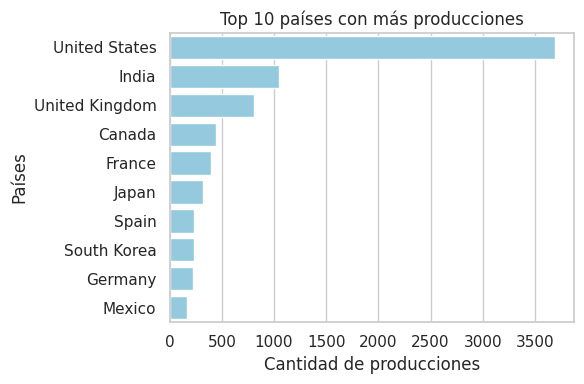

In [289]:
plt.figure(figsize=(6, 4)) # Definir el tamaño de la figura
# Gráfico de barras
sns.barplot(y="country", x="count", data=df_paises2[:10], color="skyblue", orient="h")
# Títulos
plt.xlabel('Cantidad de producciones')
plt.ylabel('Países')
plt.title('Top 10 países con más producciones')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los países que dominan el catálogo son Estados Unidos, India y Reino Unido. El hecho de que India se encuentre en el top 3 es sorprendente, lo cual expresa la capacidad de producción de Bollywood y la industria cinematográfica hindú.

In [290]:
# Inciso 8
# Conseguimos género principal (asumimos que es el primero)
df_generos = df.assign(listed_in=df["listed_in"].str.split(", "))
df_generos["genre"] = df_generos["listed_in"].str[0]

# Agrupamos por "listed_in" y "type"
df_generos2 = df_generos.groupby(["type", "genre"])["show_id"].count().reset_index().rename(columns = {"show_id": "count"})
df_generos2.head(10)

,type,genre,count
0,Movie,Action & Adventure,859
1,Movie,Anime Features,21
2,Movie,Children & Family Movies,605
3,Movie,Classic Movies,80
4,Movie,Comedies,1210
5,Movie,Cult Movies,12
6,Movie,Documentaries,829
7,Movie,Dramas,1600
8,Movie,Horror Movies,275
9,Movie,Independent Movies,20


**Suposición:** Nuevamente, asumiremos que el género principal de cada título es el primer género escrito en la columna `listed_in`.

In [291]:
# Hay mucho género aislado
# Agrupamos en "otros"

# Función recibe una columna, retorna el género o el string "Otros"
def agrupar_otros(col):
  if col["count"] < 100:
    return "Otros"
  else:
    return col["genre"]

df_generos2["genre"] = df_generos2.apply(agrupar_otros, axis = 1)
# Volvemos a agrupar
df_generos2 = df_generos2.groupby(["type", "genre"])["count"].sum().reset_index().rename(columns = {"show_id": "count"})
df_generos2

,type,genre,count
0,Movie,Action & Adventure,859
1,Movie,Children & Family Movies,605
2,Movie,Comedies,1210
3,Movie,Documentaries,829
4,Movie,Dramas,1600
5,Movie,Horror Movies,275
6,Movie,International Movies,128
7,Movie,Otros,291
8,Movie,Stand-Up Comedy,334
9,TV Show,Anime Series,176


In [292]:
# Pivoteamos para apilar
df_generos3 = df_generos2.pivot(index="type", columns="genre", values="count").fillna(0)
df_generos3

genre,Action & Adventure,Anime Series,British TV Shows,Children & Family Movies,Comedies,Crime TV Shows,Documentaries,Docuseries,Dramas,Horror Movies,International Movies,International TV Shows,Kids' TV,Otros,Reality TV,Stand-Up Comedy,TV Comedies
type,,,,,,,,,,,,,,,,,
Movie,859.0,0.0,0.0,605.0,1210.0,0.0,829.0,0.0,1600.0,275.0,128.0,0.0,0.0,291.0,0.0,334.0,0.0
TV Show,0.0,176.0,253.0,0.0,0.0,399.0,0.0,221.0,0.0,0.0,0.0,774.0,388.0,225.0,120.0,0.0,120.0


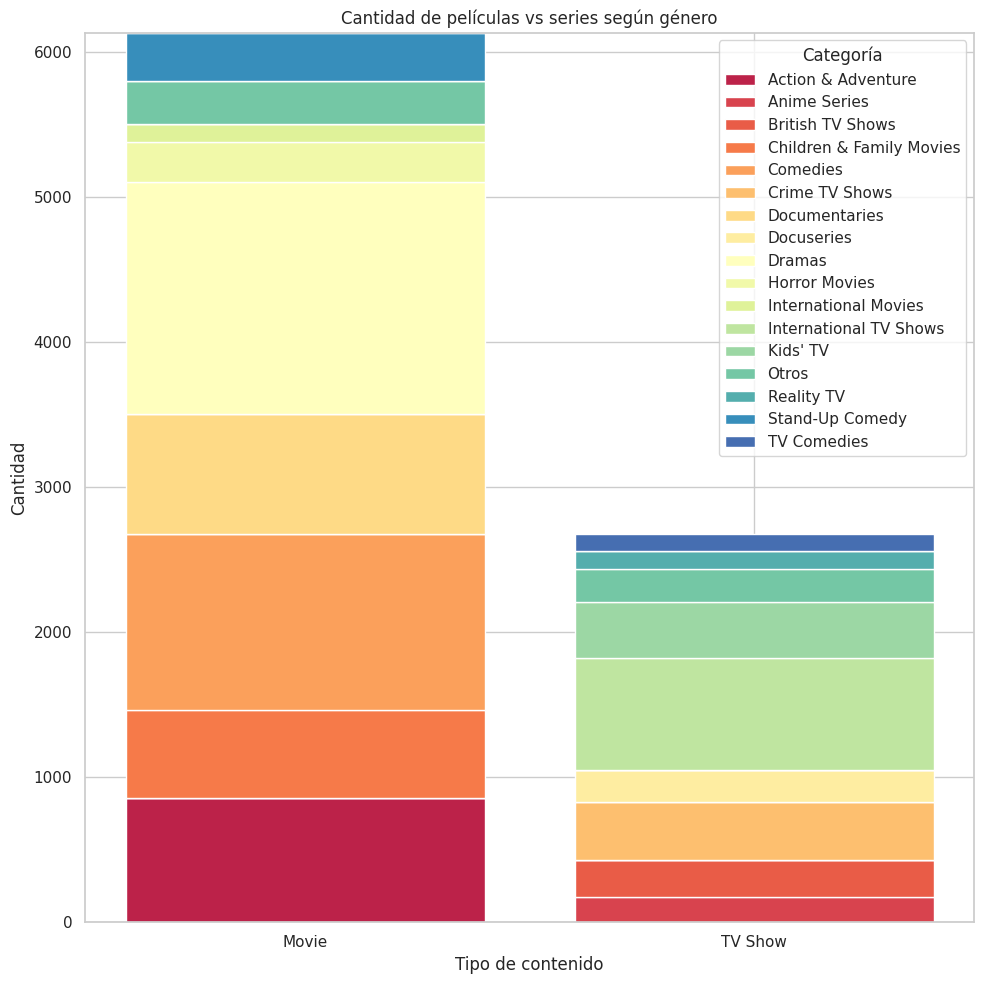

In [293]:
plt.figure(figsize=(10,10)) # Definir el tamaño de la figura
# Definir la paleta de colores
# (traté de que los colores entre categorías distintas no se confundan)
palette = sns.color_palette("Spectral", n_colors=len(df_generos3.columns))
# Apilamos las barras
bottom = None
i=0
for col in df_generos3.columns:
    color = palette[i]
    plt.bar(df_generos3.index, df_generos3[col], bottom=bottom, label=col, color=color)
    bottom = df_generos3[col] if bottom is None else bottom + df_generos3[col]
    i +=1

# Títulos
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.title('Cantidad de películas vs series según género')
plt.legend(title="Categoría")
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Sí, hay géneros que se asocian más a ciertos tipos de contenido. Por ejemplo, los géneros "Comedies" y "Dramas" se asocian más a películas, mientras que el género "International" se asocia más a series.

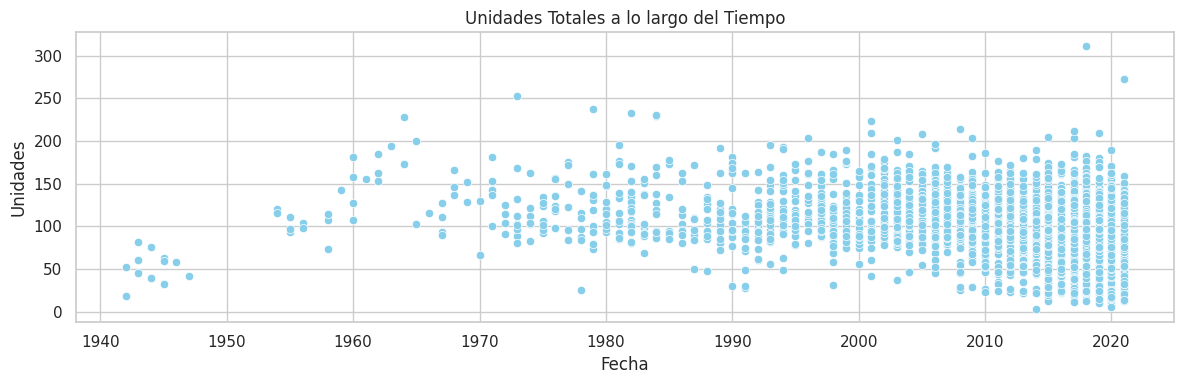

In [294]:
# Inciso 9
# Reusaremos df_duration del inciso 6
# Creamos el gráfico de dispersión
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df_duration,
    x='release_year',
    y='duration_2',
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales a lo largo del Tiempo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Sí, los estándares de duración de las películas han cambiado con el tiempo. Es posible ver que, entre 1970 y 1990, la mayoría de peliculas no eran de menos de 75 minutos ni más de 150 minutos. Con el paso del tiempo, el umbral inferior a bajado muchísimo (casi cercano a 10 minutos) y el umbral superior ha aumentado a 175 minutos aproximadamente.

Cerca de 2020, podemos ver dos outlier interesantes con una duración mucho mayor de la usual (superando las 4 horas), mientras que cerca de 1980 hay un outlier que destaca por su breve duración de aproximadamente media hora, muy inferior al estándar de la época.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

In [295]:
# Desafío Final
# Explotamos por "listed_in"
df_desafio = df.assign(listed_in=df["listed_in"].str.split(", ")).explode("listed_in")

# Agrupamos por "listed_in" y "type"
df_desafio = df_desafio.groupby(["listed_in", "rating"])["show_id"].count().reset_index().rename(columns = {"show_id": "count", "listed_in": "genre"})
df_desafio.head()

,genre,rating,count
0,Action & Adventure,G,1
1,Action & Adventure,NR,9
2,Action & Adventure,PG,32
3,Action & Adventure,PG-13,148
4,Action & Adventure,R,220


In [296]:
df_heatdesafio = df_desafio.pivot_table(index="genre", columns="rating", values="count").fillna(0)
df_heatdesafio.head(10)

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
genre,,,,,,,,,,,,,,,,,
Action & Adventure,0.0,0.0,0.0,1.0,0.0,9.0,32.0,148.0,220.0,213.0,0.0,201.0,33.0,0.0,0.0,1.0,1.0
Anime Features,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,23.0,1.0,15.0,19.0,0.0,4.0,0.0,0.0
Anime Series,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,59.0,17.0,2.0,26.0,0.0,0.0
British TV Shows,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,46.0,17.0,108.0,55.0,20.0,5.0,0.0,0.0
Children & Family Movies,0.0,0.0,0.0,33.0,0.0,0.0,195.0,11.0,0.0,18.0,51.0,1.0,85.0,113.0,129.0,5.0,0.0
Classic & Cult TV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,9.0,6.0,1.0,1.0,0.0,0.0
Classic Movies,0.0,0.0,0.0,8.0,0.0,3.0,17.0,10.0,32.0,23.0,1.0,11.0,11.0,0.0,0.0,0.0,0.0
Comedies,0.0,0.0,0.0,11.0,2.0,14.0,148.0,168.0,180.0,465.0,29.0,431.0,153.0,21.0,47.0,4.0,1.0
Crime TV Shows,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,111.0,1.0,350.0,4.0,0.0,3.0,0.0,0.0


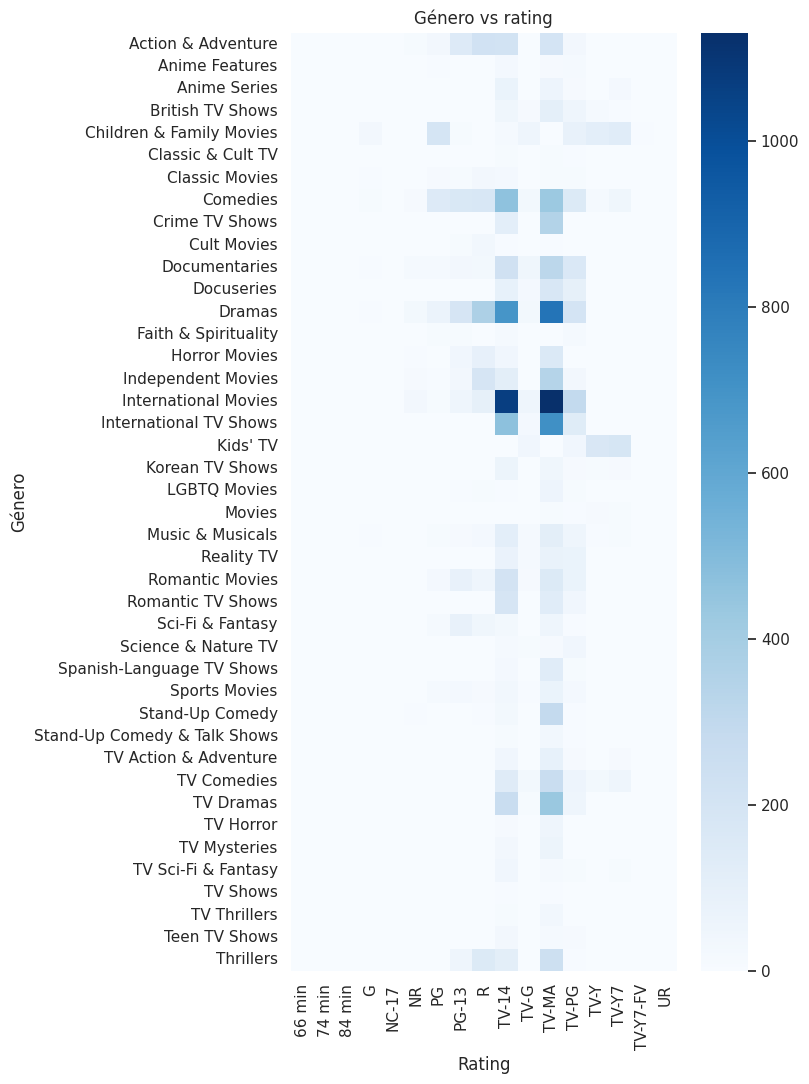

In [297]:
# Creamos el heatmap
plt.figure(figsize=(8, 11))
sns.heatmap(df_heatdesafio, cmap='Blues', fmt=".2f")

# Título
plt.xlabel('Rating')
plt.ylabel('Género')
plt.title('Género vs rating')
# Obs: No roté las etiquetas del eje x, pues los ratings son cortos y leibles
# Mostrar el heatmap
plt.tight_layout()
plt.show()

Los géneros "International Movies/TV Shows", "Dramas/TV Dramas" y "Comedies/TV Comedies", entre muchos otros, están más dirigidos a un público adulto, con ratings de TV-14, TV-MA y R. Por otro lado, evidentemente, los géneros "Kids' TV" y "Children & Family Movies" están dirigidos a un público familiar o infantil, con rating de TV-Y, TV-Y7 y PG.